# Microsoft movie studio project

## Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# Code

## Loading Data

In [1]:
# Importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')

### Loading datasets

- names.basics.csv contains the names of all people who can be crew members and their honorables movie mentions.

In [3]:
with open ('/home/nick/Documents/Project_1/Project1/data/imdb.name.basics/name.basics.csv', 'rb') as names:
    name_basics = pd.read_csv(names)

- title.akas.csv contains alternaive title names for movies.

In [4]:
with open ('/home/nick/Documents/Project_1/Project1/data/imdb.title.akas/title.akas.csv', 'rb') as title_akas:
    title_akas = pd.read_csv(title_akas)

- title.basics.csv contains the key to title Ids and their respective names.

In [5]:
with open ('/home/nick/Documents/Project_1/Project1/data/imdb.title.basics/title.basics.csv', 'rb') as title_basics:
    title_basics = pd.read_csv(title_basics)

- title.principles.csv contains the crew makeup, actors as their character names in various movies and matches.

In [6]:
with open ('/home/nick/Documents/Project_1/Project1/data/imdb.title.principals/title.principals.csv', 'rb') as title_principals:
    title_principals = pd.read_csv(title_principals)

- bom.movie_gross.csv contains the annual domestic and foreign earnings for each movie.

In [7]:
with open ('/home/nick/Documents/Project_1/Project1/data/bom.movie_gross.csv', 'rb') as bom_gross:
    bom_gross = pd.read_csv(bom_gross)

- rt.movie_info.tsv contains movie Ids their discretion rating, writers, directors, grossing, theatre and DVD release dates grouped by production studios.

In [8]:
with open ('/home/nick/Documents/Project_1/Project1/data/rt.movie_info.tsv', 'rb') as rt_movie:
    rt_movie = pd.read_csv(rt_movie, sep='\t')

- rt.reviews.tsv contains movie reviews with below 3/5 being rotten and above being fresh. 

In [9]:
with open ('/home/nick/Documents/Project_1/Project1/data/rt.reviews.tsv', 'rb') as rt_reviews:
    rt_reviews = pd.read_csv(rt_reviews, sep='\t', encoding = 'unicode_escape')

- title.crew.csv matches movie title id, director id and writer id

In [10]:
with open("/home/nick/Documents/Project_1/Project1/data/title.crew.csv", "rb") as title_crew:
    title_crew = pd.read_csv(title_crew)

- title.ratings.csv contains the avarage ratings and number of reviews for movies according to title id.

In [11]:
with open ('/home/nick/Documents/Project_1/Project1/data/title.ratings.csv', 'rb') as title_ratings:
    title_ratings = pd.read_csv(title_ratings)

- tmdb.movies.csv contains movie genre classes, original titles and original language versions.

In [12]:
with open ("/home/nick/Documents/Project_1/Project1/data/tmdb.movies.csv", 'rb') as tmdb_movies:
    tmdb_movies = pd.read_csv(tmdb_movies)

- tn.movies_budgets.csv contains the movie budget, domestic and worldwide gross and their release dates.

In [13]:
with open ("/home/nick/Documents/Project_1/Project1/data/tn.movie_budgets.csv",  'rb') as movie_budgets:
    movie_budgets = pd.read_csv(movie_budgets)

## Exploring the Data

Our datasets are:
- name_basics
- title_akas
- title_basics
- title_principals
- bom_gross
- rt_movie
- rt_reviews
- title_crew
- title_ratings
- tmdb_movies
- movie_budgets

In [14]:
print(name_basics.shape)
name_basics.head()

(606648, 6)


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [15]:
print(title_principals.shape)
title_principals.head()

(1028186, 6)


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [16]:
print(title_crew.shape)
title_crew.head()

(146144, 3)


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [17]:
print(title_akas.shape)
title_akas.head()

(331703, 8)


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [18]:
print(title_basics.shape)
title_basics.head()

(146144, 6)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [19]:
print(title_ratings.shape)
title_ratings.head()

(73856, 3)


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [20]:
print(bom_gross.shape)
bom_gross.head()

(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [21]:
print(rt_movie.shape)
rt_movie.head()

(1560, 12)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [22]:
print(rt_reviews.shape)
rt_reviews.head()

(54432, 8)


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [23]:
print(movie_budgets.shape)
movie_budgets.head()

(5782, 6)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [24]:
print(tmdb_movies.shape)
tmdb_movies.head()

(26517, 10)


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Data Analysis

### Domestic vs Foreign gross

#### Data cleaning

##### Getting movie_budgets in order

In [25]:
movie_budgets.duplicated().sum()

0

In [26]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


There is no duplicates and missing data in our dataframe.

We need `'domestic_gross', 'production_budget', 'worldwide_gross'` columns to be float dtype

In [27]:
# removing commas from the lists that should be numeric types
movie_budgets[['domestic_gross', 'production_budget', 'worldwide_gross']] = movie_budgets[['domestic_gross', 'production_budget', 'worldwide_gross']].replace(to_replace = ',', value = "", regex = True )

In [28]:
# Removing the $ signs from our values
numeric_cols = ['domestic_gross', 'production_budget', 'worldwide_gross']
for col in numeric_cols:
    movie_budgets[col] = movie_budgets[col].str.lstrip('$')

In [29]:
# now convert dtypes
for col in numeric_cols:
    movie_budgets[col] = movie_budgets[col].astype(float)
# confirm
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


Change `release_date` column to display year only and change type to int

In [30]:
movie_budgets['release_date'] = movie_budgets['release_date'].apply(lambda x: str(x)[-4:])
movie_budgets['release_date'] = movie_budgets['release_date'].astype(int)

Create a foreign_gross column

In [31]:
movie_budgets['foreign_gross'] = movie_budgets['worldwide_gross'] - movie_budgets['domestic_gross']

In [32]:
# renaming to make merge easier
movie_budgets.rename(columns = {'movie': 'title', 'release_date': 'year'}, inplace = True)

Since `movie_budgets` and `bom_gross` contain similar data I will combine them.

##### Getting bom_gross in order

In [33]:
# Taking off the . in our number strings
bom_gross['foreign_gross'] = bom_gross['foreign_gross'].str.replace('.', '', regex = True)

In [34]:
# extract the bad values from the column
foreign_gross = list(bom_gross['foreign_gross'])
bad_values = []
good_values = ['1131600000', '1019400000', '1163000000', '1010000000', '1369500000']
for c in foreign_gross:
    if ',' in str(c):
        bad_values.append(c)
bad_values

['1,1316', '1,0194', '1,1630', '1,0100', '1,3695']

In [35]:
# replace the bad values with commas with convertible values
for x in good_values:
    for y in bad_values:
        bom_gross['foreign_gross'] = bom_gross['foreign_gross'].str.replace(f'{y}', f'{x}', regex = True)

In [36]:
# Changing column dtype
bom_gross['foreign_gross'] = bom_gross['foreign_gross'].astype(float)

In [37]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


##### Merging

In [38]:
budgets_n_gross = movie_budgets.merge(bom_gross, on = ['title', 'year', 'domestic_gross', 'foreign_gross'], how = 'outer')

In [39]:
budgets_n_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9169 entries, 0 to 9168
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   float64
 1   year               9169 non-null   int64  
 2   title              9169 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     9141 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   foreign_gross      7819 non-null   float64
 7   studio             3382 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 644.7+ KB


Compute worldwide gross, domestic gross and foreign gross again to fill those that don't have.

In [40]:
budgets_n_gross['worldwide_gross'] = budgets_n_gross['domestic_gross'] + budgets_n_gross['foreign_gross']
budgets_n_gross['domestic_gross'] = budgets_n_gross['worldwide_gross'] - budgets_n_gross['foreign_gross']
budgets_n_gross['foreign_gross'] = budgets_n_gross['worldwide_gross'] - budgets_n_gross['domestic_gross']
# check to see if any change has happened
budgets_n_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9169 entries, 0 to 9168
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   float64
 1   year               9169 non-null   int64  
 2   title              9169 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     7791 non-null   float64
 5   worldwide_gross    7791 non-null   float64
 6   foreign_gross      7791 non-null   float64
 7   studio             3382 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 644.7+ KB


Drop all NaN values in `foreign_gross`, `domestic_gross` and `worldwide_gross` columns as they serve no purpose

In [41]:
budgets_n_gross.dropna(subset =  ['domestic_gross', 'foreign_gross', 'worldwide_gross'], inplace = True)
# Also drop 'studio' column as it has no function in this dataset
budgets_n_gross.drop('studio', axis = 1, inplace = True)

In [42]:
budgets_n_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7791 entries, 0 to 9135
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   float64
 1   year               7791 non-null   int64  
 2   title              7791 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     7791 non-null   float64
 5   worldwide_gross    7791 non-null   float64
 6   foreign_gross      7791 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 486.9+ KB


Check for duplicates since some records have duplicates.

We use the `title` and `year` columns since they are the ones that are most likely similar for duplicates. Keep the first records for duplicates.

In [43]:
# Checking for duplicates 
# if title and year are the same then it should be a duplicate
budgets_n_gross[budgets_n_gross.duplicated(subset = ['title', 'year', ])].sample(n = 10)

,id,year,title,production_budget,domestic_gross,worldwide_gross,foreign_gross
6250,NaN,2011,The Eagle,NaN,19500000.0,27100000.0,7600000.0
8717,NaN,2017,Table 19,NaN,3600000.0,5000000.0,1400000.0
6336,NaN,2011,Martha Marcy May Marlene,NaN,3000000.0,3548000.0,548000.0
6254,NaN,2011,Your Highness,NaN,21600000.0,24900000.0,3300000.0
7042,NaN,2013,Dark Skies,NaN,17400000.0,26400000.0,9000000.0
8587,NaN,2017,The Shape of Water,NaN,63900000.0,195300000.0,131400000.0
7701,NaN,2015,The Last Witch Hunter,NaN,27400000.0,147000000.0,119600000.0
6939,NaN,2013,The Lone Ranger,NaN,89300000.0,260500000.0,171200000.0
8650,NaN,2017,Gifted,NaN,24800000.0,43000000.0,18200000.0
7687,NaN,2015,Alvin and the Chipmunks: The Road Chip,NaN,85900000.0,234800000.0,148900000.0


In [44]:
budgets_n_gross[budgets_n_gross['title'] == 'Mud']

,id,year,title,production_budget,domestic_gross,worldwide_gross,foreign_gross
3597,98.0,2013,Mud,10000000.0,21590086.0,31556959.0,9966873.0
7031,NaN,2013,Mud,NaN,21600000.0,32600000.0,11000000.0


In [45]:
# Drop the duplicates
budgets_n_gross.drop_duplicates(subset = ['year', 'title'], ignore_index = True, keep = 'first', inplace = True)

In [46]:
budgets_n_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5781 non-null   float64
 1   year               6727 non-null   int64  
 2   title              6727 non-null   object 
 3   production_budget  5781 non-null   float64
 4   domestic_gross     6727 non-null   float64
 5   worldwide_gross    6727 non-null   float64
 6   foreign_gross      6727 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 368.0+ KB


#### Domestic vs foreign gross

Checking the correlationship between domestic and foreign gross

In [47]:
# we are going to use correlation and covariance between the columns
budgets_n_gross['domestic_gross'].corr(budgets_n_gross['foreign_gross'], method = 'pearson')

0.8359558911110325

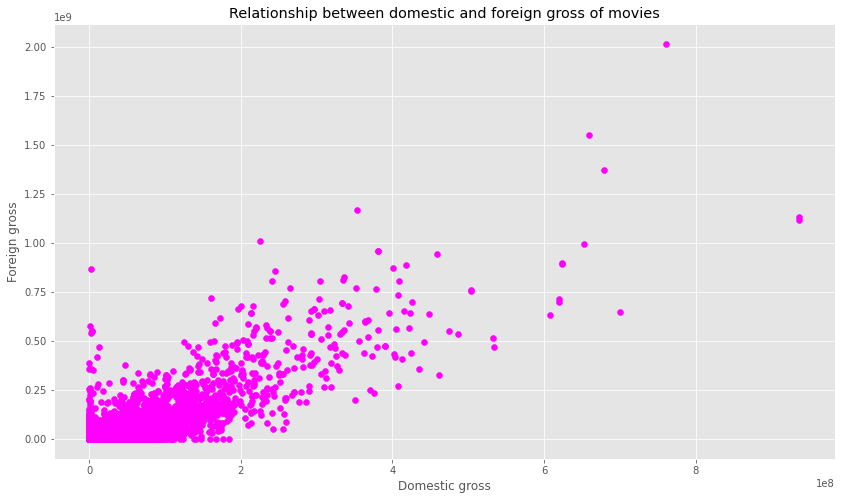

In [48]:
# Plot a scatter plot to illustrate our findings
revenue_relationships, ax = plt.subplots(figsize = (14,8))
# set our plots
ax.scatter(x = budgets_n_gross['domestic_gross'],
          y = budgets_n_gross['foreign_gross'],
          color = 'magenta')
# # trying to make plots start at point of origin 
# plt.xlim([budgets_n_gross['domestic_gross'].min(), (budgets_n_gross['domestic_gross'].max() + 20000000)])
# plt.ylim([budgets_n_gross['foreign_gross'].min(), (budgets_n_gross['foreign_gross'].max() + 20000000)])
# set graph labels
ax.set_xlabel('Domestic gross')
ax.set_ylabel('Foreign gross')
ax.set_title('Relationship between domestic and foreign gross of movies')
plt.show()

Domestic gross and foreign gross have a very strong positive relationship.

This means that if a movie has a high domestic gross then it is very likely to have a high foreign gross too.

### Budget vs Grossing(revenue) and Profits

In order to not change our initial dataframe. Create a dataframe where NaN `production_budget` values are dropped. 

This is so that no NaN values affect our plots.

In [49]:
prod_drop_nan = budgets_n_gross.dropna(subset=['production_budget'], axis = 0).copy()

In [50]:
# confirm change
prod_drop_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5781 entries, 0 to 5780
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5781 non-null   float64
 1   year               5781 non-null   int64  
 2   title              5781 non-null   object 
 3   production_budget  5781 non-null   float64
 4   domestic_gross     5781 non-null   float64
 5   worldwide_gross    5781 non-null   float64
 6   foreign_gross      5781 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 361.3+ KB


In [51]:
prod_drop_nan.head()

,id,year,title,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,1.0,2009,Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09
1,2.0,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08
2,3.0,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08
3,4.0,2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08
4,5.0,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08


#### Budget vs grossing

In [52]:
prod_drop_nan['production_budget'].corr(prod_drop_nan['worldwide_gross'], method = 'pearson')

0.7483120075752207

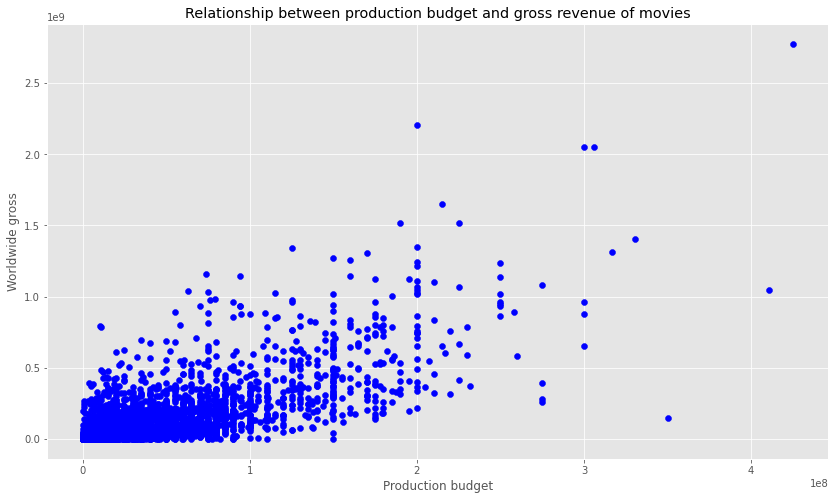

In [53]:
bud_gross, ax = plt.subplots(figsize = (14,8))
ax.scatter(x = prod_drop_nan['production_budget'],
          y = prod_drop_nan['worldwide_gross'],
          color = 'blue')

# ax.set_xlim([prod_drop_nan['production_budget'].min(), (prod_drop_nan['production_budget'].max() + 10000000)])
# ax.set_ylim([prod_drop_nan['worldwide_gross'].min(), (prod_drop_nan['worldwide_gross'].max() + 20000000)])

ax.set_xlabel("Production budget")
ax.set_ylabel('Worldwide gross')
ax.set_title("Relationship between production budget and gross revenue of movies")
plt.show()

The strong positive relationship between production budget and worldwide gross suggests that: 

Movies with more resources invested in them have a chance at a good profit margin.

#### Budget vs profit

Make a profit margin column

In [54]:
# (revenue - budget)/ revenue
prod_drop_nan['profit_margin'] = (prod_drop_nan['worldwide_gross'] - prod_drop_nan['production_budget']) / (prod_drop_nan['worldwide_gross'])

In [55]:
# Profit = worldwide gross - production budget
profit = prod_drop_nan['worldwide_gross'] - prod_drop_nan['production_budget']

In [56]:
# Relationship between production budget and profit
prod_drop_nan['production_budget'].corr(profit, method = 'pearson')

0.6087681186820771

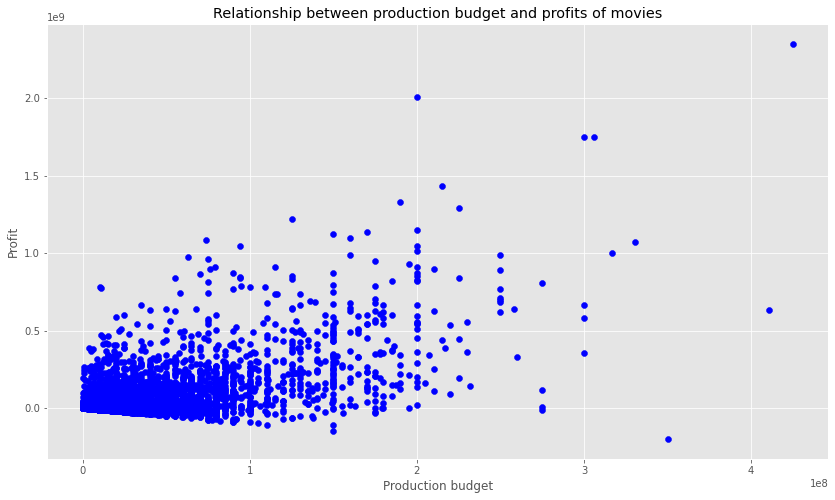

In [57]:
#graph plot
bud_profit, ax = plt.subplots(figsize = (14,8))
ax.scatter(x = prod_drop_nan['production_budget'],
          y = profit,
          color = 'blue')
ax.set_title('Relationship between production budget and profits of movies')
ax.set_xlabel('Production budget')
ax.set_ylabel('Profit')
plt.show()

The relationship between the two is positive though it's just a bit above average in strength.

Having a high budget for a movie, although not with certainity, can translate to higher profits afterwards. There's a chance of making losses after making a movie.

#### Descriptive values for domestic gross, foreign gross and budget for a movie

Create a function for calculating the descriptive values of columns.

In [58]:
def descriptive_values(df_name, column_name):
    # enclose in float() to prevent results from showing the other data shown after calling dataframes eg dtypes
    mode = float(df_name[column_name].mode())
    mean = float(df_name[column_name].mean())
    median = float(df_name[column_name].median())
    
    return f"The column of the dataframe called has a mean of {mean}, mode of {mode} and median of {median}"

In [59]:
descriptive_values(budgets_n_gross, 'domestic_gross')

'The column of the dataframe called has a mean of 39037335.60383529, mode of 0.0 and median of 13596911.0'

In [60]:
descriptive_values(budgets_n_gross, 'worldwide_gross')

'The column of the dataframe called has a mean of 88362667.0845845, mode of 0.0 and median of 25114901.0'

In [61]:
# In this dataset production_budget has no NaN values that's why I use it
descriptive_values(prod_drop_nan, 'production_budget')

'The column of the dataframe called has a mean of 31593134.6708182, mode of 20000000.0 and median of 17000000.0'

### More data cleaning

#### Merge `title_akas`, `title_ratings`, `title_basics` and `budgets_n_gross`

merge akas and ratings

In [62]:
title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [63]:
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [64]:
# rename tconst from ratings to title_id
title_ratings.rename(columns = {'tconst': 'title_id'}, inplace = True)

In [65]:
# fusing akas and ratings to get the title ids
# using left join to try and fill as many rows in akas as possible
akas_n_ratings = title_akas.merge(title_ratings, on='title_id', how = 'left')

In [66]:
akas_n_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331703 entries, 0 to 331702
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
 8   averagerating      261806 non-null  float64
 9   numvotes           261806 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 27.8+ MB


merge akas_n_ratings with title basics

In [67]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [68]:
# Change the tconst col name to title_id for easy merge
title_basics.rename(columns = {'tconst': 'title_id'}, inplace = True)

In [69]:
# merge it with akas_n_ratings
basic_akas_ratings = akas_n_ratings.merge(title_basics, how = 'left', on = 'title_id')

In [70]:
basic_akas_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331703 entries, 0 to 331702
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
 8   averagerating      261806 non-null  float64
 9   numvotes           261806 non-null  float64
 10  primary_title      331703 non-null  object 
 11  original_title     331690 non-null  object 
 12  start_year         331703 non-null  int64  
 13  runtime_minutes    300806 non-null  float64
 14  genres             327844 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 40

In [71]:
basic_akas_ratings.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0,7.0,539338.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0,7.0,539338.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0,7.0,539338.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0,7.0,539338.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"


Merge budgets_n_gross and basic_akas_ratings

In [72]:
budgets_n_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5781 non-null   float64
 1   year               6727 non-null   int64  
 2   title              6727 non-null   object 
 3   production_budget  5781 non-null   float64
 4   domestic_gross     6727 non-null   float64
 5   worldwide_gross    6727 non-null   float64
 6   foreign_gross      6727 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 368.0+ KB


In [137]:
finances_titles = budgets_n_gross.merge(basic_akas_ratings, how = "left", on = 'title')

In [138]:
finances_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16263 entries, 0 to 16262
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 13858 non-null  float64
 1   year               16263 non-null  int64  
 2   title              16263 non-null  object 
 3   production_budget  13858 non-null  float64
 4   domestic_gross     16263 non-null  float64
 5   worldwide_gross    16263 non-null  float64
 6   foreign_gross      16263 non-null  float64
 7   title_id           12649 non-null  object 
 8   ordering           12649 non-null  float64
 9   region             9906 non-null   object 
 10  language           1925 non-null   object 
 11  types              9000 non-null   object 
 12  attributes         395 non-null    object 
 13  is_original_title  12648 non-null  float64
 14  averagerating      11795 non-null  float64
 15  numvotes           11795 non-null  float64
 16  primary_title      126

In [139]:
finances_titles.head()

,id,year,title,production_budget,domestic_gross,worldwide_gross,foreign_gross,title_id,ordering,region,...,types,attributes,is_original_title,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,1.0,2009,Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,tt1775309,2.0,XWW,...,imdbDisplay,NaN,0.0,6.1,43.0,Avatar,Abatâ,2011.0,93.0,Horror
1,2.0,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,tt1298650,14.0,US,...,NaN,NaN,0.0,6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,2.0,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,tt1298650,19.0,NaN,...,original,NaN,1.0,6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
3,2.0,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,tt1298650,23.0,CA,...,imdbDisplay,NaN,0.0,6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
4,3.0,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,tt6565702,16.0,US,...,NaN,NaN,0.0,6.0,24451.0,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"


Clear the duplicates 

In [140]:
# if title, worldwide_gross and year are the same then the record must be a duplicate
# there are 6727 duplicates
finances_titles[finances_titles.duplicated(subset = ['title', 'worldwide_gross', 'year'])]

,id,year,title,production_budget,domestic_gross,worldwide_gross,foreign_gross,title_id,ordering,region,...,types,attributes,is_original_title,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
2,2.0,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,804600000.0,tt1298650,19.0,NaN,...,original,NaN,1.0,6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
3,2.0,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,804600000.0,tt1298650,23.0,CA,...,imdbDisplay,NaN,0.0,6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
5,3.0,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,107000000.0,tt6565702,1.0,BD,...,imdbDisplay,NaN,0.0,6.0,24451.0,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
6,3.0,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,107000000.0,tt6565702,22.0,MX,...,imdbDisplay,NaN,0.0,6.0,24451.0,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
7,3.0,2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,107000000.0,tt6565702,5.0,NaN,...,original,NaN,1.0,6.0,24451.0,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16254,NaN,2018,I Still See You,NaN,1400.0,1.501400e+06,1500000.0,tt2160105,12.0,NaN,...,original,NaN,1.0,5.7,5010.0,I Still See You,I Still See You,2018.0,98.0,"Fantasy,Thriller"
16255,NaN,2018,I Still See You,NaN,1400.0,1.501400e+06,1500000.0,tt2160105,17.0,US,...,imdbDisplay,NaN,0.0,5.7,5010.0,I Still See You,I Still See You,2018.0,98.0,"Fantasy,Thriller"
16257,NaN,2018,The Catcher Was a Spy,NaN,725000.0,9.540000e+05,229000.0,tt4602066,3.0,NaN,...,original,NaN,1.0,6.2,4653.0,The Catcher Was a Spy,The Catcher Was a Spy,2018.0,98.0,"Biography,Drama,War"
16259,NaN,2018,Time Freak,NaN,10000.0,2.660000e+05,256000.0,tt6769280,4.0,NaN,...,original,NaN,1.0,5.7,3455.0,Time Freak,Time Freak,2018.0,104.0,"Comedy,Drama,Romance"


In [141]:
finances_titles.duplicated(subset = ['title', 'worldwide_gross', 'year']).sum()

9536

There are many duplicates some even more than 2

Drop the duplicates

In [142]:
finances_titles.drop_duplicates(subset = ['title', 'worldwide_gross', 'year'], inplace = True)
finances_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6727 entries, 0 to 16261
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5781 non-null   float64
 1   year               6727 non-null   int64  
 2   title              6727 non-null   object 
 3   production_budget  5781 non-null   float64
 4   domestic_gross     6727 non-null   float64
 5   worldwide_gross    6727 non-null   float64
 6   foreign_gross      6727 non-null   float64
 7   title_id           3113 non-null   object 
 8   ordering           3113 non-null   float64
 9   region             2276 non-null   object 
 10  language           417 non-null    object 
 11  types              1955 non-null   object 
 12  attributes         108 non-null    object 
 13  is_original_title  3113 non-null   float64
 14  averagerating      2892 non-null   float64
 15  numvotes           2892 non-null   float64
 16  primary_title      3113

# GENRES VS OTHERS

Drop nan values from genres column

In [309]:
finances_titles.dropna(subset = ['genres'], inplace = True)

Make a list of genres.

In [310]:
finances_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3104 entries, 0 to 16261
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2492 non-null   float64
 1   year               3104 non-null   int64  
 2   title              3104 non-null   object 
 3   production_budget  2492 non-null   float64
 4   domestic_gross     3104 non-null   float64
 5   worldwide_gross    3104 non-null   float64
 6   foreign_gross      3104 non-null   float64
 7   title_id           3104 non-null   object 
 8   ordering           3104 non-null   float64
 9   region             2269 non-null   object 
 10  language           417 non-null    object 
 11  types              1953 non-null   object 
 12  attributes         108 non-null    object 
 13  is_original_title  3104 non-null   float64
 14  averagerating      2891 non-null   float64
 15  numvotes           2891 non-null   float64
 16  primary_title      3104

In [311]:
genres = list(finances_titles['genres'])

Make it into a list of lists

In [312]:
genres_list = []
genres_replaced = []
for rec in genres:
    replaced_rec = str(rec).replace(',', ' ')
    list_rec = replaced_rec.split()
    
    genres_list.append(list_rec)

In [313]:
genres_list[0: 10]

[['Horror'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Thriller'],
 ['Action', 'Thriller'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Western']]

Add our new list to our dataset with column name as `genres_rev` and replace `genres` column with genres replaced list.

In [314]:
finances_titles['genres_rev'] = genres_list

Subset the columns we need for analysis

In [329]:
data = finances_titles[['title_id', 'title', 'primary_title', 'production_budget', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'region', 'averagerating', 'runtime_minutes', 'genres_rev']].copy()

Reset the index

In [330]:
data.reset_index(drop = True, inplace = True)

Make a list of all available genres

In [331]:
genre_titles = []
for rec in genres_list:
    for genre in rec:
        if genre not in genre_titles:
            genre_titles.append(genre)

In [332]:
genre_titles[0: 6]

['Horror', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller']

Make a function to convert our list to a dictionary

In [333]:
def Convert_list(lst):
    genre_dct = {i: [] for i in lst}
    return genre_dct

In [334]:
genre_t_dict = Convert_list(genre_titles)

Use 1s and 0s (true or false) as verifications to whether a genre is in a row. 
Then make rows in `data` that represent a genre.

In [335]:
# making a list of 1s and 0s 
for genre, value in genre_t_dict.items():
    if genre:
        for rec in genres_list:
            for x in rec:
                if genre == x:
                    value.append(1)
                    break
                elif genre != x:
                    value.append(0)
                    break
    


In [336]:
# confirm the code works
len(genre_t_dict['Thriller'])

3104

Create the new genre columns in `data`

In [337]:
for genre, value in genre_t_dict.items():
    data[genre] = value

In [338]:
data

,title_id,title,primary_title,production_budget,domestic_gross,foreign_gross,worldwide_gross,region,averagerating,runtime_minutes,...,Romance,Mystery,Biography,Documentary,History,Sport,War,Musical,Music,News
0,tt1775309,Avatar,Avatar,425000000.0,760507625.0,2.015838e+09,2.776345e+09,XWW,6.1,93.0,...,0,0,0,0,0,0,0,0,0,0
1,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,8.046000e+08,1.045664e+09,US,6.6,136.0,...,0,0,0,0,0,0,0,0,0,0
2,tt6565702,Dark Phoenix,Dark Phoenix,350000000.0,42762350.0,1.070000e+08,1.497624e+08,US,6.0,113.0,...,0,0,0,0,0,0,0,0,0,0
3,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,330600000.0,459005868.0,9.440081e+08,1.403014e+09,US,7.3,141.0,...,0,0,0,0,0,0,0,0,0,0
4,tt4154756,Avengers: Infinity War,Avengers: Infinity War,300000000.0,678815482.0,1.369319e+09,2.048134e+09,AR,8.5,149.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3099,tt2245970,Wildlife,Wildlife,NaN,1100000.0,2.000000e+06,3.100000e+06,XWW,6.8,115.0,...,0,0,0,0,0,0,0,0,0,0
3100,tt2160105,I Still See You,I Still See You,NaN,1400.0,1.500000e+06,1.501400e+06,FR,5.7,98.0,...,0,0,0,0,0,0,0,0,0,0
3101,tt4602066,The Catcher Was a Spy,The Catcher Was a Spy,NaN,725000.0,2.290000e+05,9.540000e+05,US,6.2,98.0,...,0,0,1,0,0,0,0,0,0,0
3102,tt6769280,Time Freak,Time Freak,NaN,10000.0,2.560000e+05,2.660000e+05,US,5.7,104.0,...,0,0,0,0,0,0,0,0,0,0


### Runtime(movie length) vs Grossing and Budgets

Copy the neccessary info we need to a new dataset.

In [ ]:
runtime_revenue = finances_titles[['title', 'runtime_minutes', 'worldwide_gross', 'production_budget']].copy()

In [ ]:
runtime_revenue.info()

In [ ]:
# fill nan values in the runtime column with the median
# there are 4081 nan records
# make a new column where nans are filled
runtime_revenue['runtime_minutes_alt'] = runtime_revenue['runtime_minutes'].fillna(runtime_revenue['runtime_minutes'].median())

In [ ]:
runtime_revenue.info()

#### Runtime vs grossing

In [ ]:
runtime_revenue['runtime_minutes_alt'].corr(runtime_revenue['worldwide_gross'], method = 'pearson')

In [ ]:
# Graph the above info
runtime_gross, ax = plt.subplots(figsize = (14,8))
ax.scatter(x = runtime_revenue['runtime_minutes_alt'],
          y = runtime_revenue['worldwide_gross'],
          color = 'red')
ax.set_xlabel('Runtime minutes')
ax.set_ylabel('Worldwide gross')
ax.set_title('Relationship between runtime and grossing of movies')
plt.show()

The relationship between runtime and grossing is very weak although it's positive. 

This is to say that a making a long movie doesn't result to higher grossing. On the contary, it seems that movies have a normalized range of length. Lets investigate that.

#### Runtime vs budget

In [ ]:
# drop all nan values in production_budget column
prod_run = runtime_revenue.dropna(subset = ['production_budget'])

In [ ]:
prod_run['runtime_minutes_alt'].corr(prod_run['production_budget'], method = 'pearson')

In [ ]:
runtime_bud, ax = plt.subplots(figsize = (14,8))
ax.scatter(x = prod_run['runtime_minutes_alt'],
          y = prod_run['production_budget'],
          marker = 'h',
          color = 'r')
ax.set_xlabel('Runtime minutes')
ax.set_ylabel('Production budget')
plt.title('Relationship between runtime and production budgets of movies')
plt.show()

Movie runtimes have a weak relation with production budgets.

Long movies don't neccessarily take more resources to produce. As even the long movies in our data take lesser budget compared to the others.

#### Runtime Mean, median and mode

Use the initial runtime minutes to get more accurate values

In [ ]:
descriptive_values(prod_run, 'runtime_minutes')

### Number of movie Versions(translations) vs Grossing and Budget

Create a table having only title_ids and counts of versions (this is the number of existing versions of a movie)

In [ ]:
versions = basic_akas_ratings.groupby(by = 'title_id').count().reset_index()[['title_id', 'title']]

In [ ]:
versions.rename(columns = {'title': 'versions'}, inplace = True)

Merge `versions` with `finances_titles` then extract financial values, title_id and versions

In [ ]:
# merge 
gross_versions = finances_titles.merge(versions, how = 'left', on = 'title_id')
# duplicates don't make much of a difference here so I let them stay
# fill the versions column
gross_versions['versions'].fillna(gross_versions['versions'].median(), inplace = True)
# Drop nans
gross_versions.dropna(subset = ['title_id', 'worldwide_gross'])
# pick the specific columns we need from the dataset
gross_versions = gross_versions[['title_id', 'production_budget', 'worldwide_gross', 'versions']]

#### Versions vs grossing

In [ ]:
# Check correlation between world gross and versions
gross_versions['worldwide_gross'].corr(gross_versions['versions'], method = 'pearson')

In [ ]:
version_gross, ax = plt.subplots(figsize = (14,8))
ax.scatter(x = gross_versions['versions'],
          y = gross_versions['worldwide_gross'],
          color = 'c') # cyan
ax.set_title('Relationship between number of movie versions and grossing')
ax.set_xlabel('Version count')
ax.set_ylabel('Worldwide gross')
plt.show()

The relationship is positive although it is below average.

Producing more versions or translations of a movie doesn't really guarantee a raise in its grossing. However, as we move to the right on our graph we see that the distribution of the plots show that the grossing of movies with more versions is a bit better than the ones with less.

#### Versions vs budget

In [ ]:
# drop Nans from production budget column
bud_versions = gross_versions.dropna(subset = ['production_budget'])
# Check the correlation
bud_versions['production_budget'].corr(bud_versions['versions'], method = 'pearson')

In [ ]:
versions_bud, ax = plt.subplots(figsize = (14,8))
ax.scatter(x = bud_versions['versions'],
          y = bud_versions['production_budget'],
          color = 'c') 
ax.set_xlabel('Version count')
ax.set_ylabel('Production budget')
ax.set_title('Relationship between number of movie versions and production budget')
plt.show()

The relationship between movie versions and production budget is positive but average in strength.

From our graph we see that producing more versions doesn't really raise the budget always. However, it seems more likely that to produce many versions, the budget will go up.

### Popularity vs Grossing, Budget and Versions

Extract the neccessary columns from `finances_titles` then merge with `tmdb_movies` to get genre ids and popularity

In [ ]:
# Select columns from finance titles
finances_cut = finances_titles[['title', 'production_budget', 'worldwide_gross', 'title_id', 'averagerating', 'numvotes', 'genres']]

In [ ]:
finances_cut.info()

#### Merging

In [ ]:
# merge our extract and tmdb movies
gross_pop = finances_cut.merge(tmdb_movies[['title', 'genre_ids', 'popularity']], on = 'title', how = 'left')

In [ ]:
gross_pop.info()

In [ ]:
# remove duplicate records.
gross_pop.drop_duplicates(subset = ['title_id', 'genres', 'popularity'], inplace = True)
# drop nans from popularity column
gross_pop.dropna(subset = ['popularity'], inplace = True)
# reset index
gross_pop.reset_index(drop = True, inplace = True)

#### Popularity vs grossing

In [ ]:
gross_pop['worldwide_gross'].corr(gross_pop['popularity'], method = 'pearson')

In [ ]:
# Make a scatter plot
pop_gross, ax = plt.subplots(figsize = (14,8))
ax.scatter(x = gross_pop['popularity'],
          y = gross_pop['worldwide_gross'],
          color = 'purple')
ax.set_title('Relationship between movie popularity and its grossing')
ax.set_xlabel('Popularity')
ax.set_ylabel('Worldwide gross')
plt.show()

Though our correlation coefficient indicates an average strength, positive relationship; our graph shows that more popular movies have a better grossing than average.

#### Popularity vs budget

In [ ]:
gross_pop['production_budget'].corr(gross_pop['popularity'], method = 'pearson')

In [ ]:
# Make a scatter plot
pop_bud, ax = plt.subplots(figsize = (14,8))
ax.scatter(x = gross_pop['popularity'],
          y = gross_pop['production_budget'],
          color = 'purple')
ax.set_xlabel('Popularity')
ax.set_ylabel('Production budget')
ax.set_title('Relationship between movie popularity and budget')
plt.show()

With an average strength, positive relationship between budget and popularity we can observe that it generally takes more resources to produce those really popular movies.

#### Popularity vs versions

Merge `versions` with `gross_pop` 

In [ ]:
pop_versions = gross_pop.merge(versions, on = 'title_id', how = 'left')

In [ ]:
pop_versions.info()

In [ ]:
# fill nans in version column with median of the column
pop_versions['versions'].fillna(value = pop_versions['versions'].median(), inplace = True)

In [ ]:
# check the correlation
pop_versions['popularity'].corr(pop_versions['versions'], method = 'pearson')

In [ ]:
# plot the data
pop_version, ax = plt.subplots(figsize = (14,8))
ax.scatter(x = pop_versions['popularity'],
          y = pop_versions['versions'],
          color = 'purple')
ax.set_xlabel('Popularity')
ax.set_ylabel('Version count')
ax.set_title('Relationship between popularity and versions')
plt.show()

Our variables have an average positive relationship.

We observe from the graph that the trend for really popular movies is that they have a number of versions of the same movie.

### Vote count vs Grossing, Budget and Popularity

Copy the `finance_cut` dataset so we can make permanent changes on the copy.

In [ ]:
# Copy the dataset so we can make permanent changes
finances_cut_copy = finances_cut.copy()

In [ ]:
# remove nans from num votes column
finances_cut_copy.dropna(subset = ['numvotes'], inplace = True)
# remove duplicates
finances_cut_copy.drop_duplicates(subset = ['title_id', 'averagerating'], inplace = True)

In [ ]:
finances_cut_copy.info()

#### Vote count vs grossing

In [ ]:
finances_cut_copy['numvotes'].corr(finances_cut_copy['worldwide_gross'], method = 'pearson')

In [ ]:
# Make a scatter plot
votes_gross, ax = plt.subplots(figsize = (14,8))
ax.scatter(x = finances_cut_copy['numvotes'],
          y = finances_cut_copy['worldwide_gross'],
          color = 'k')
ax.set_xlabel('Vote count')
ax.set_ylabel('Worldwide gross')
ax.set_title('Relationship between vote count and grossing')
plt.show()

There's an average positive relationship between our variables. 

Those movies with a high vote count have a greater grossing than most movies.

#### Vote count vs budget

In [ ]:
finances_cut_copy['numvotes'].corr(finances_cut_copy['production_budget'], method = 'pearson')

In [ ]:
# Make a scatter plot
votes_bud, ax = plt.subplots(figsize = (14,8))
ax.scatter(x = finances_cut_copy['numvotes'],
          y = finances_cut_copy['production_budget'],
          color = 'black')
ax.set_xlabel('Vote count')
ax.set_ylabel('Production budget')
ax.set_title('Relationship between vote count and budget')
plt.show()

Our variables have an average positive relationship.

Movies with above average vote counts generally have higher budgets for their productions

#### Vote count vs popularity

Use `gross_pop` dataset to analyse this relationship.

In [ ]:
gross_pop.info()

In [ ]:
# drop nan values in numvotes column
pop_votes = gross_pop.dropna(subset = ['numvotes'])

In [ ]:
pop_votes['popularity'].corr(pop_votes['numvotes'], method = 'pearson')

In [ ]:
votes_pop, ax = plt.subplots(figsize = (14,8))
ax.scatter(x = pop_votes['numvotes'],
          y = pop_votes['popularity'],
          color = 'k')
ax.set_xlabel('Vote count')
ax.set_ylabel('Popularity')
ax.set_title('Realtionship between vote count and popularity')
plt.show()

Our variables have an average positive relationship.

Most movies with high number of votes are more popular than average. This means that if a movie is popular people are more likely to vote on it.

### Average rating vs Grossing, Budget and Popularity

#### Ratings vs grossing

We are just gonna use the `finances cut copy` dataset.

In [ ]:
finances_cut_copy['averagerating'].corr(finances_cut_copy['worldwide_gross'], method = 'pearson')

In [ ]:
# Make a scatter plot
rating_gross, ax = plt.subplots(figsize = (14,8))
ax.scatter(x = finances_cut_copy['averagerating'],
          y = finances_cut_copy['worldwide_gross'],
          color = 'green')
ax.set_xlabel('Average rating')
ax.set_ylabel('Worldwide gross')
ax.set_title('Relationship between average rating and grossing of movies')
plt.show()

Our variables have a very weak positive relationship.

However, higher rated movies seem to have a greater grossing as compared to the movies with low ratings.

#### Ratings vs budget

In [ ]:
finances_cut_copy['averagerating'].corr(finances_cut_copy['production_budget'], method = 'pearson')

In [ ]:
# Make a scatter plot
rating_bud, ax = plt.subplots(figsize = (14,8))
ax.scatter(x = finances_cut_copy['averagerating'],
          y = finances_cut_copy['production_budget'],
          color = 'green')
ax.set_xlabel('Average rating')
ax.set_ylabel('Production budget')
ax.set_title('Relationship between average rating and budget of movies')
plt.show()

Our variables have a very weak positive relationship.

When we observe our graph we can see that higher rated movies generally have greater budgets when compared to the movies with low ratings.

#### Ratings vs popularity

We are gonna use `pop_votes` dataset as the columns we need are cleaned.

In [ ]:
pop_votes['averagerating'].corr(pop_votes['popularity'], method = 'pearson')

In [ ]:
rating_pop, ax = plt.subplots(figsize = (14,8))
ax.scatter(x = pop_votes['averagerating'],
          y = pop_votes['popularity'],
          color = 'green')
ax.set_xlabel('Average rating')
ax.set_ylabel('Popularity')
ax.set_title('Relationship between average rating and popularity')
plt.show()

Our variables have a very weak positive relationship.

However, from our graph we can observe that as we move towards higher ratings the movies there are more popular than ones with low ratings.

## Conclusion